In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('jamboree_dataset.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 1. Defining problem statement

### Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
### They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Additional View

#### Lin Reg. will also help predict one's chances of admission given the rest of the variables.
#### GRE Score, TOEFL Score & CGPA are most important attributes as per Indian Perspective.

## Observations on data

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
# Statistical Summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
# Missing value detection

df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Duplicate value detection

df.duplicated().sum()

0

In [8]:
# dropping not necessary columns
df.drop(columns=['Serial No.'],inplace=True)

### Univariate Analysis

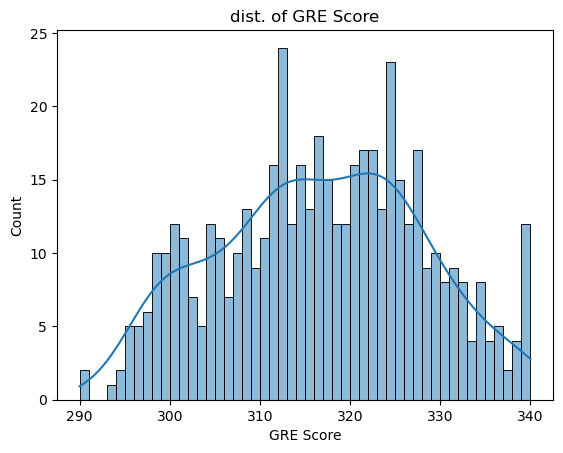

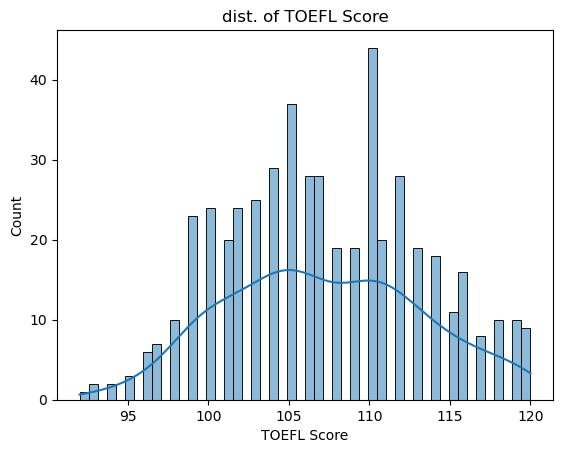

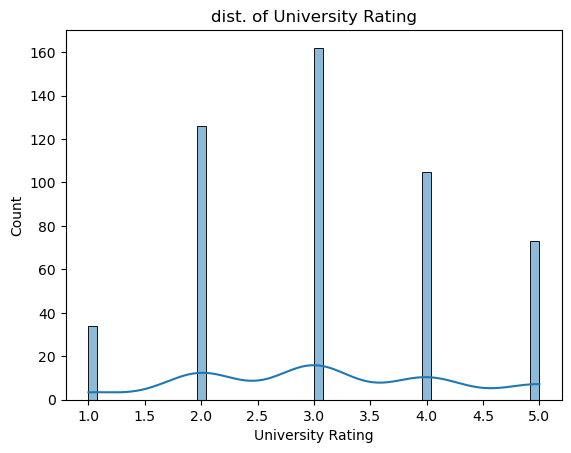

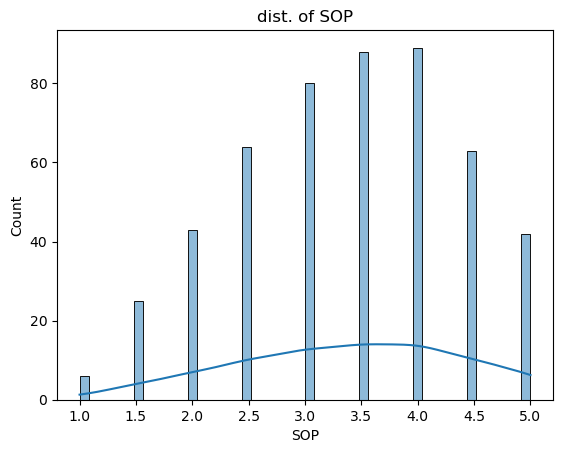

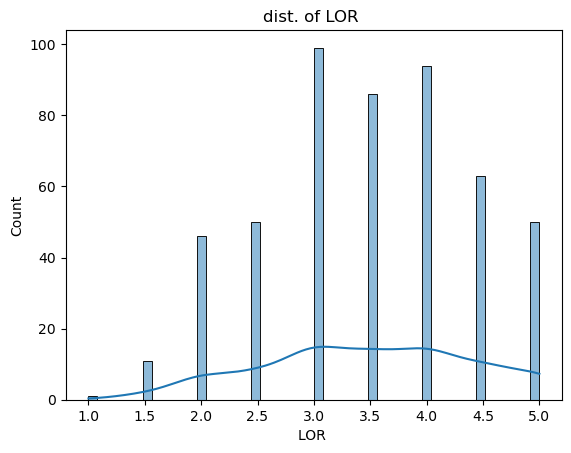

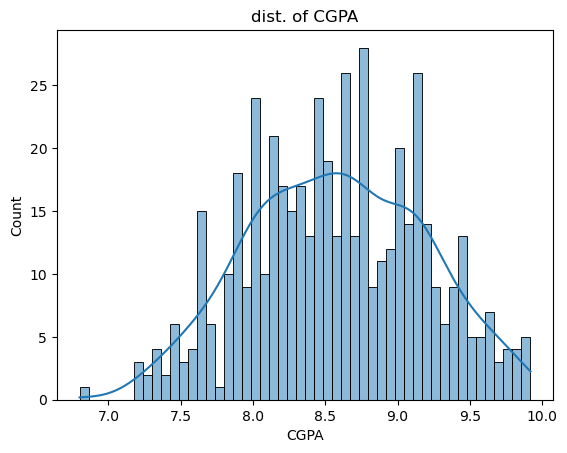

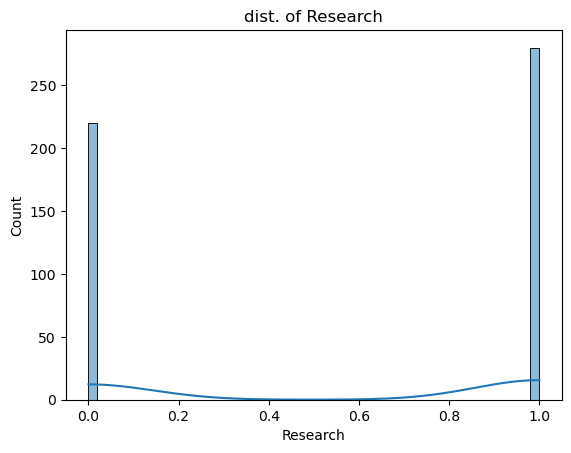

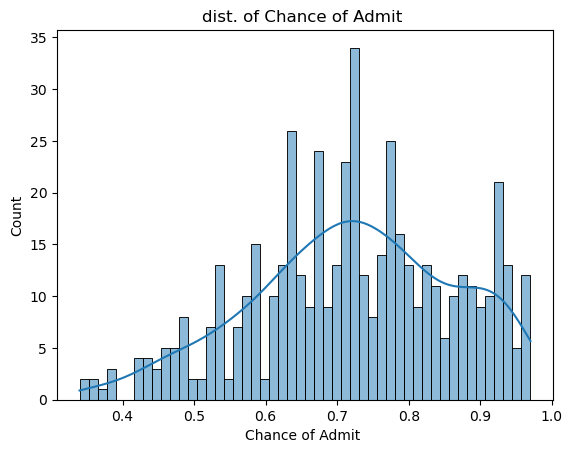

In [9]:
for i in df.columns:
    sns.histplot(df[i],kde=True,bins=50)
    plt.title(f"dist. of {i}")
    plt.show()

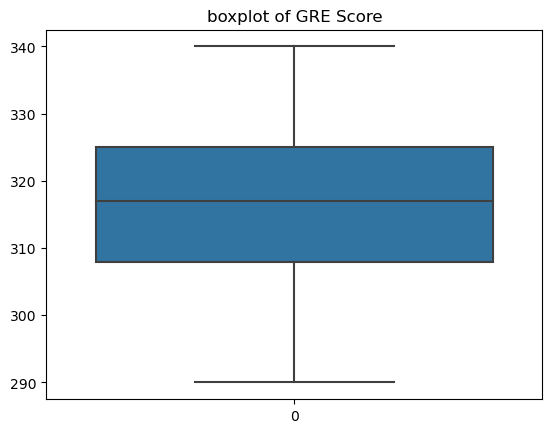

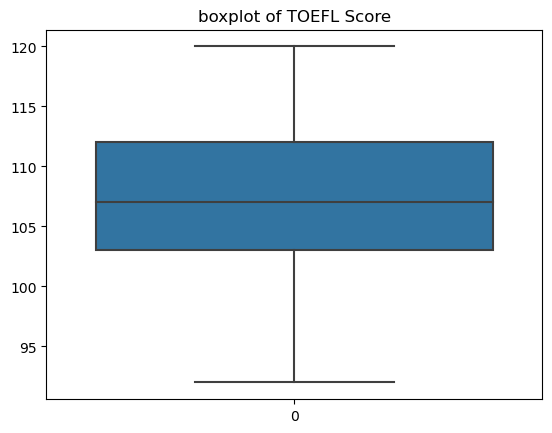

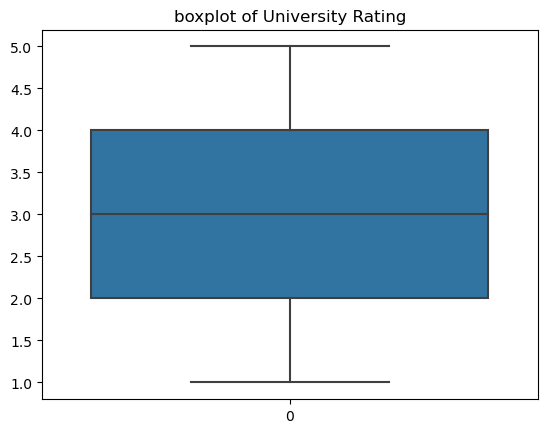

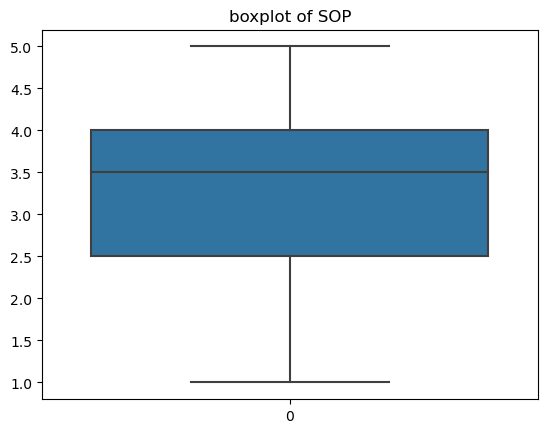

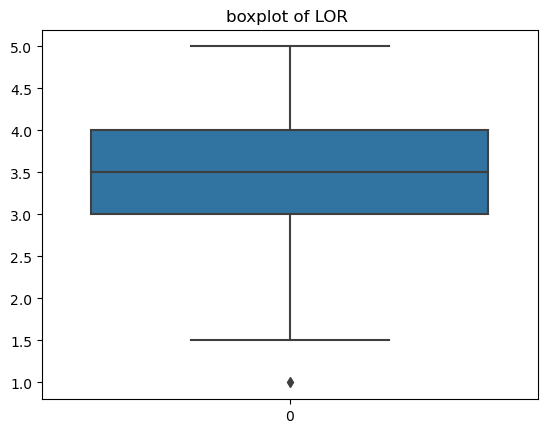

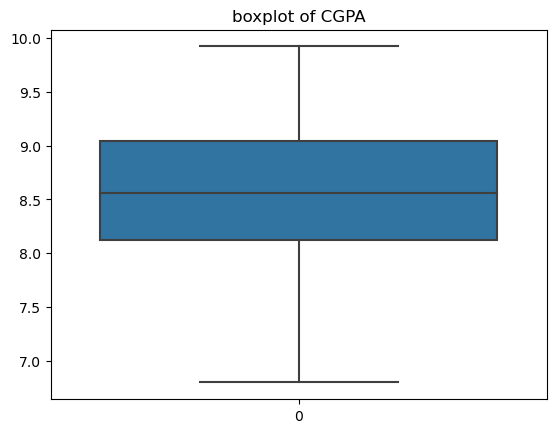

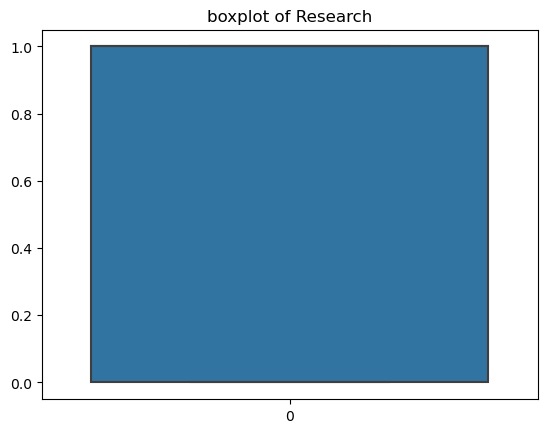

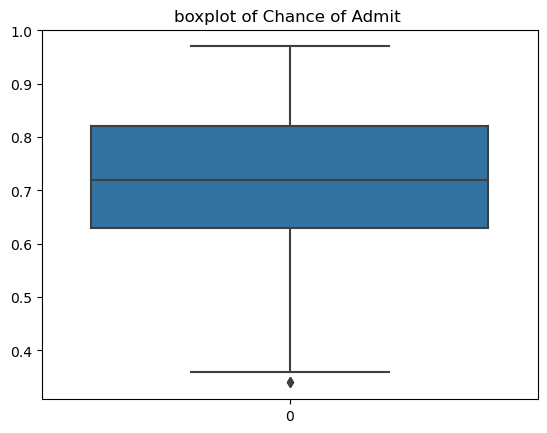

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(f"boxplot of {i}")
    plt.show()

## Bivariate Analysis

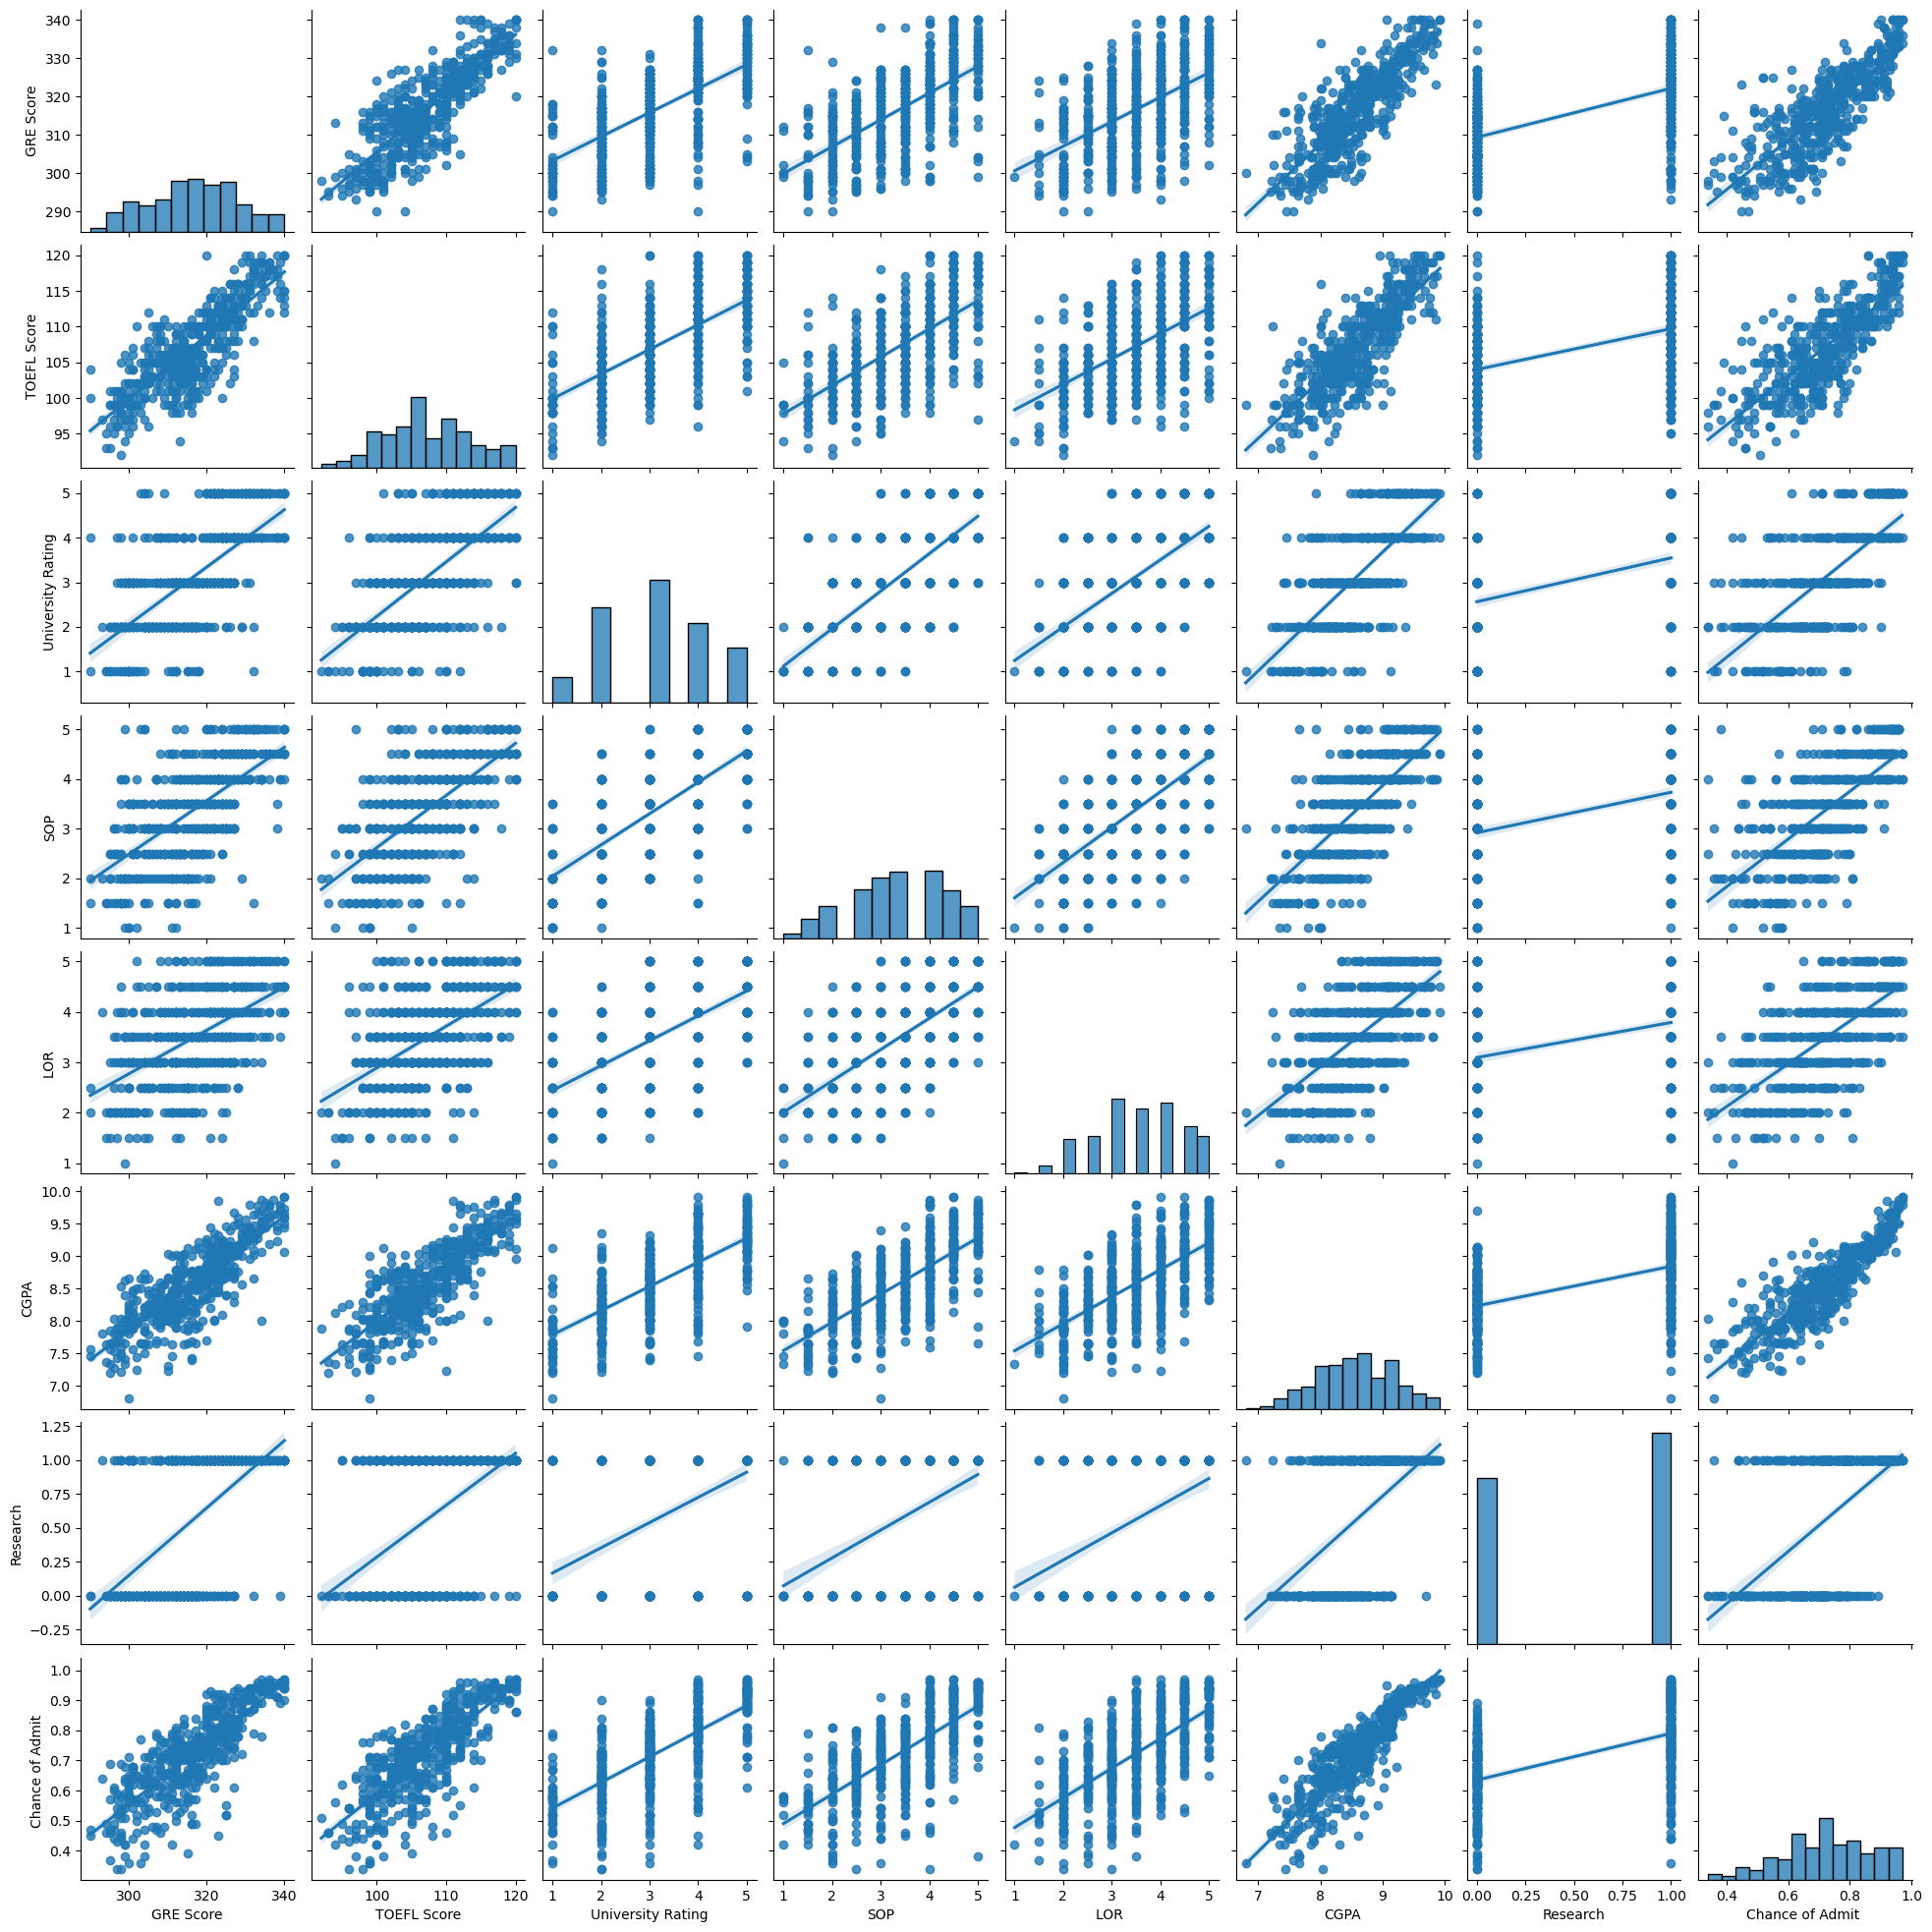

In [104]:
sns.pairplot(data=df,kind='reg')

#### There is a high correlation between Gre Scores, TOEFL scores , CGPA with Chance of Admit. Let's see them individually

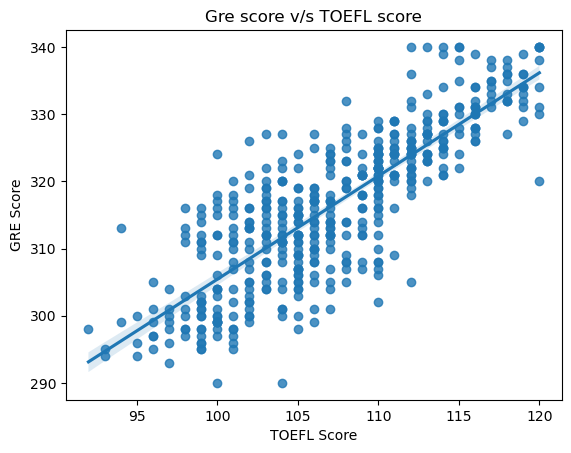

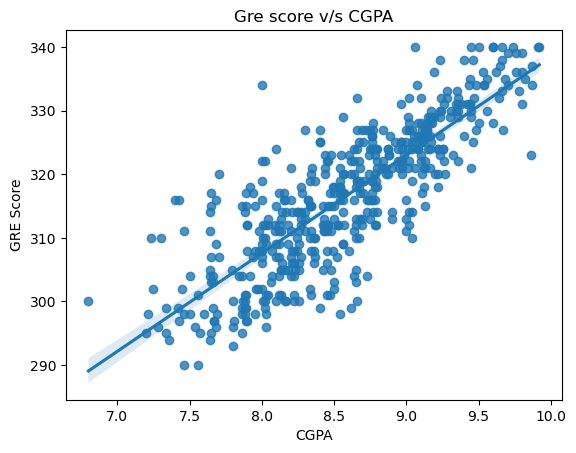

In [11]:
sns.regplot(data=df,x='TOEFL Score',y='GRE Score')
plt.title("Gre score v/s TOEFL score")
plt.show()

sns.regplot(data=df,x='CGPA',y='GRE Score')
plt.title("Gre score v/s CGPA")
plt.show()

Text(0, 0.5, 'CGPA')

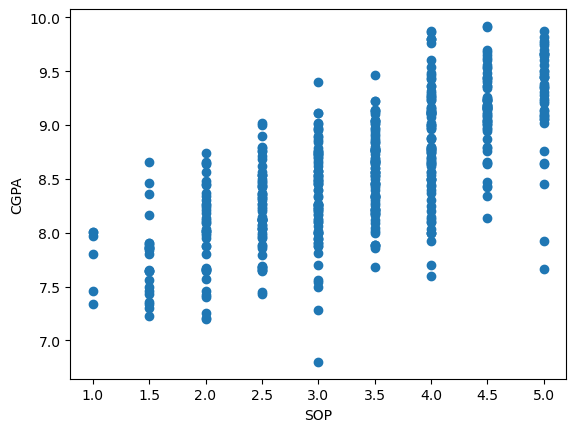

In [12]:
plt.scatter(df['SOP'],df['CGPA'])
plt.xlabel('SOP')
plt.ylabel('CGPA')

Text(0, 0.5, 'TOEFL Score')

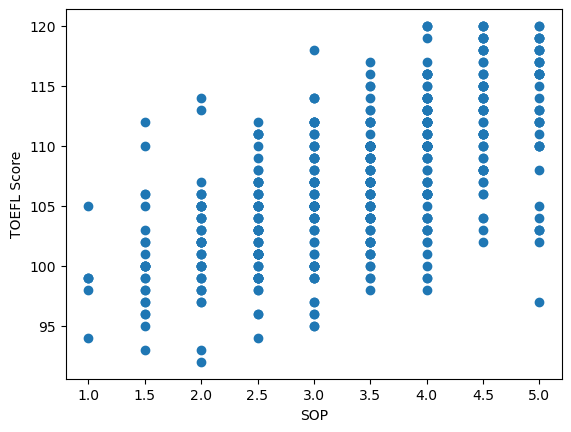

In [13]:
plt.scatter(df['SOP'],df['TOEFL Score'])
plt.xlabel('SOP')
plt.ylabel('TOEFL Score')

Text(0, 0.5, 'University Rating')

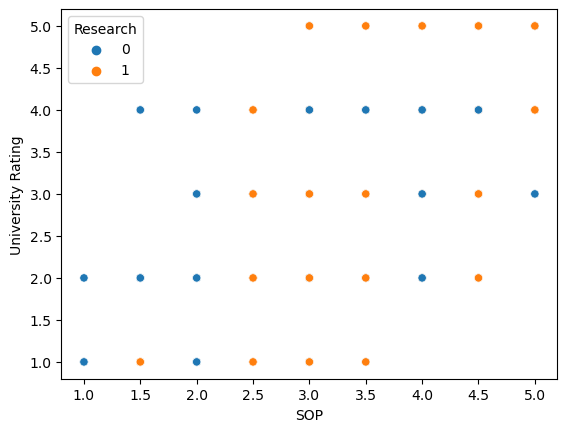

In [14]:
sns.scatterplot(data=df,x='SOP',y='University Rating',hue='Research')
plt.xlabel('SOP')
plt.ylabel('University Rating')

### we see last three plots have no correlation between them

## Correlation Analysis : Heatmap

<Axes: >

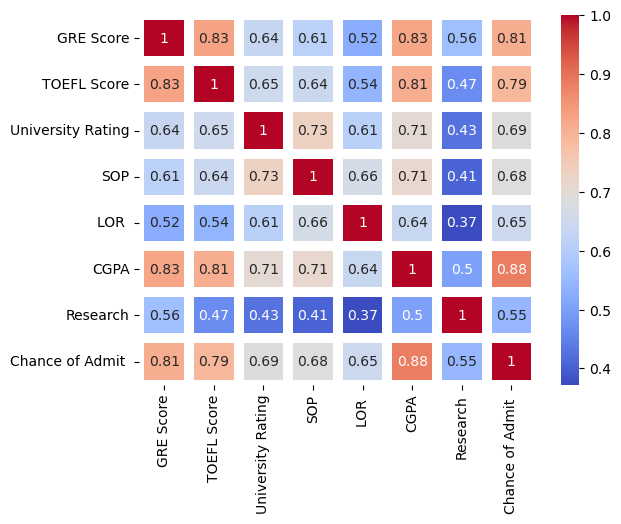

In [15]:
sns.heatmap(df.corr(),annot=True,linewidths=6,linecolor='white',cmap='coolwarm')

## Detecting outliers

In [16]:
for i in df.columns:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    
    outliers = df.loc[(df[i]>upper_whisker) | (df[i]<lower_whisker) ]
    
    print(f"column : {i}")
    print(f'q1 : {round(q1,2)}')
    print(f'q3 : {round(q3,2)}')
    print(f'iqr : {round(iqr,2)}')
    print(f'upper_whisker : {round(upper_whisker,2)}')
    print(f'lower_whisker : {round(lower_whisker,2)}')
    print(f'No. of outliers : {outliers.shape[0]}')
    print('-'*45)

column : GRE Score
q1 : 308.0
q3 : 325.0
iqr : 17.0
upper_whisker : 350.5
lower_whisker : 282.5
No. of outliers : 0
---------------------------------------------
column : TOEFL Score
q1 : 103.0
q3 : 112.0
iqr : 9.0
upper_whisker : 125.5
lower_whisker : 89.5
No. of outliers : 0
---------------------------------------------
column : University Rating
q1 : 2.0
q3 : 4.0
iqr : 2.0
upper_whisker : 7.0
lower_whisker : -1.0
No. of outliers : 0
---------------------------------------------
column : SOP
q1 : 2.5
q3 : 4.0
iqr : 1.5
upper_whisker : 6.25
lower_whisker : 0.25
No. of outliers : 0
---------------------------------------------
column : LOR 
q1 : 3.0
q3 : 4.0
iqr : 1.0
upper_whisker : 5.5
lower_whisker : 1.5
No. of outliers : 1
---------------------------------------------
column : CGPA
q1 : 8.13
q3 : 9.04
iqr : 0.91
upper_whisker : 10.41
lower_whisker : 6.76
No. of outliers : 0
---------------------------------------------
column : Research
q1 : 0.0
q3 : 1.0
iqr : 1.0
upper_whisker : 2

### Now, train_test_split the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns=['Chance of Admit '])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
y= df[['Chance of Admit ']]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
13,307,109,3,4.0,3.0,8.00,1
61,307,101,3,4.0,3.0,8.20,0
298,330,114,3,4.5,4.5,9.24,1
39,307,108,2,4.0,3.5,7.70,0
360,322,110,3,4.0,5.0,8.64,1


In [22]:
y_train.head()

,Chance of Admit
13,0.62
61,0.47
298,0.90
39,0.48
360,0.85


In [23]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1


In [24]:
y_test.head()

,Chance of Admit
304,0.62
340,0.75
47,0.89
67,0.57
479,0.79


# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
standardscaler_X = StandardScaler()
standardscaler_y = StandardScaler()

In [63]:
standardscaler_X.fit(X_train)
standardscaler_y.fit(y_train)

StandardScaler()

In [64]:
X_train_scaled = pd.DataFrame(standardscaler_X.transform(X_train),columns=X_train.columns)
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.835273,0.290158,-0.078091,0.610894,-0.537795,-0.984509,0.901927
1,-0.835273,-1.018123,-0.078091,0.610894,-0.537795,-0.645374,-1.108738
2,1.210968,1.107834,-0.078091,1.105831,1.057360,1.118128,0.901927
3,-0.835273,0.126623,-0.959759,0.610894,-0.006077,-1.493212,-1.108738
4,0.499232,0.453693,-0.078091,0.610894,1.589079,0.100723,0.901927
...,...,...,...,...,...,...,...
345,-0.835273,0.453693,0.803577,0.610894,1.057360,-0.357109,-1.108738
346,0.410265,0.617228,1.685245,1.600768,1.589079,1.474220,0.901927
347,0.766133,-0.036912,-0.078091,-0.378980,-0.006077,0.897691,0.901927
348,0.855100,0.617228,1.685245,1.105831,0.525642,1.101172,0.901927


In [65]:
X_test_scaled = pd.DataFrame(standardscaler_X.transform(X_test),columns=X_test.columns)
X_test_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.301471,-0.200447,-0.959759,-0.873918,-1.601232,-0.255369,-1.108738
1,-0.390438,-0.036912,-0.078091,-0.378980,-0.537795,-0.204498,0.901927
2,2.011670,1.925510,1.685245,1.105831,0.525642,1.898139,-1.108738
3,-0.034570,-0.036912,-0.959759,0.115957,-0.006077,0.100723,0.901927
4,0.766133,0.453693,0.803577,1.105831,0.525642,0.643339,0.901927
...,...,...,...,...,...,...,...
145,-0.479405,-0.363983,-0.959759,-0.378980,-1.601232,-0.781028,0.901927
146,-0.568372,-0.200447,-0.959759,0.115957,-1.069514,-0.424936,-1.108738
147,-1.102174,-1.181658,0.803577,-1.863792,-1.069514,-1.255817,-1.108738
148,-0.568372,-0.200447,0.803577,-1.863792,-1.069514,-0.374066,-1.108738


In [66]:
y_train_scaled = pd.DataFrame(standardscaler_y.transform(y_train),columns=y_train.columns)
y_train_scaled

,Chance of Admit
0,-0.768001
1,-1.863059
2,1.276108
3,-1.790055
4,0.911089
...,...
345,0.473065
346,1.495120
347,0.838085
348,1.130100


In [67]:
y_test_scaled = pd.DataFrame(standardscaler_y.transform(y_test),columns=y_test.columns)
y_test_scaled

,Chance of Admit
0,-0.768001
1,0.181050
2,1.203104
3,-1.133020
4,0.473065
...,...
145,0.035042
146,0.035042
147,-2.228079
148,-1.133020


### Training the model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [71]:
pd.DataFrame(zip(X_train_scaled.columns,model.coef_.reshape(-1,1)),columns=['Features','Coefficients'])

,Features,Coefficients
0,GRE Score,[0.1356751011425747]
1,TOEFL Score,[0.17028480542031418]
2,University Rating,[0.08382456012270531]
3,SOP,[-0.0074453049925799625]
4,LOR,[0.09279508956491599]
5,CGPA,[0.46081413152020484]
6,Research,[0.10217042917740914]


In [72]:
model.intercept_

array([7.68235036e-16])

In [73]:
y_pred=model.predict(X_test_scaled)
y_pred[:5]

array([[-0.52852421],
       [-0.1149729 ],
       [ 1.54403646],
       [ 0.04571041],
       [ 0.67771551]])

### Calculating different metrics

In [74]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [75]:
print('MAE :', mean_absolute_error(y_test_scaled.values,y_pred))
print('MSE :', mean_squared_error(y_test_scaled.values,y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test_scaled.values,y_pred)))
print('R2 score', r2_score(y_test_scaled.values,y_pred))

MAE : 0.3210378470786949
MSE : 0.21989448411723614
RMSE : 0.4689290821832616
R2 score 0.8157672116057979


In [76]:
# adjusted R2 score
R2 = r2_score(y_test_scaled.values,y_pred)
adj_r2 = 1 - ((1-R2)*(X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1))
print('Adjusted R2 score : ',adj_r2)

Adjusted R2 score :  0.8066853135863654


### Trying Lasso and Ridge Regression

In [77]:
from sklearn.linear_model import Lasso,Ridge

In [78]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

In [79]:
lasso.fit(X_train_scaled,y_train_scaled)

Lasso(alpha=0.1)

In [80]:
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lasso[:5]

array([-0.34830126, -0.13624282,  1.49042904,  0.01822799,  0.5690417 ])

### Coefficients for Lasso

In [81]:
pd.DataFrame(zip(X_train_scaled.columns,lasso.coef_.reshape(-1,1)),columns=['Features','Coefficients'])

,Features,Coefficients
0,GRE Score,[0.1251471059652301]
1,TOEFL Score,[0.13763802424824292]
2,University Rating,[0.060715364894424716]
3,SOP,[0.0]
4,LOR,[0.035267749609211224]
5,CGPA,[0.47412520370409134]
6,Research,[0.04253770816366524]


### Metrics for Lasso

In [82]:
print('MAE :', mean_absolute_error(y_test_scaled.values,y_pred_lasso))
print('MSE :', mean_squared_error(y_test_scaled.values,y_pred_lasso))
print('RMSE :', np.sqrt(mean_squared_error(y_test_scaled.values,y_pred_lasso)))
print('R2 score', r2_score(y_test_scaled.values,y_pred_lasso))

MAE : 0.34069647855827667
MSE : 0.24480258884203807
RMSE : 0.4947752912606268
R2 score 0.7948986136257844


In [83]:
# adjusted R2 score
R2 = r2_score(y_test_scaled.values,y_pred_lasso)
adj_r2 = 1 - ((1-R2)*(X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1))
print('Adjusted R2 score for Lasso : ',adj_r2)

Adjusted R2 score for Lasso :  0.7847879819031118


In [84]:
# Now Calculating the same for Ridge

ridge.fit(X_train_scaled,y_train_scaled)

Ridge()

In [85]:
y_pred_ridge = lasso.predict(X_test_scaled)
y_pred_ridge[:5]

array([-0.34830126, -0.13624282,  1.49042904,  0.01822799,  0.5690417 ])

### Coefficients for Ridge

In [86]:
pd.DataFrame(zip(X_train_scaled.columns,ridge.coef_.reshape(-1,1)),columns=['Features','Coefficients'])

,Features,Coefficients
0,GRE Score,[0.1373745013051829]
1,TOEFL Score,[0.17072761968469582]
2,University Rating,[0.08402872886899014]
3,SOP,[-0.00597853157606726]
4,LOR,[0.09304670558710607]
5,CGPA,[0.4563622033574722]
6,Research,[0.10230890236651272]


### Metrics for Ridge

In [87]:
print('MAE :', mean_absolute_error(y_test_scaled.values,y_pred_ridge))
print('MSE :', mean_squared_error(y_test_scaled.values,y_pred_ridge))
print('RMSE :', np.sqrt(mean_squared_error(y_test_scaled.values,y_pred_ridge)))
print('R2 score', r2_score(y_test_scaled.values,y_pred_ridge))

MAE : 0.34069647855827667
MSE : 0.24480258884203807
RMSE : 0.4947752912606268
R2 score 0.7948986136257844


In [88]:
# adjusted R2 score
R2 = r2_score(y_test_scaled.values,y_pred_ridge)
adj_r2 = 1 - ((1-R2)*(X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1))
print('Adjusted R2 score for Ridge : ',adj_r2)

Adjusted R2 score for Ridge :  0.7847879819031118


### Getting actual predicted values

In [89]:
y_pred_unscaled=standardscaler_y.inverse_transform(y_pred)
y_pred_unscaled[:15]

array([[0.65280328],
       [0.70945113],
       [0.93670057],
       [0.73146137],
       [0.81803279],
       [0.66920636],
       [0.74796312],
       [0.71437662],
       [0.79220523],
       [0.66014296],
       [0.66818041],
       [0.57365165],
       [0.79048746],
       [0.79275362],
       [0.77460648]])

## Assumptions of linear regression
#### No multicollinearity
#### The mean of residual is nearly zero.
#### Linearity of Variables
#### Test of homoscedasticity
#### Normality of residual

### Calculating VIF for predictor variables in the training set

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]

In [92]:
print(vif_data)

            Variable       VIF
0          GRE Score  4.490801
1        TOEFL Score  4.150300
2  University Rating  2.999308
3                SOP  2.962935
4               LOR   2.026492
5               CGPA  4.634872
6           Research  1.528120


In [93]:
def vif(df):
    cols = df.columns
    
    vif_table = []
    for i in range(len(cols)):
        model = LinearRegression()
        model.fit(df.drop([cols[i]],axis=1), df[[cols[i]]])
        r2 = model.score(df.drop([cols[i]],axis=1), df[[cols[i]]])
        vif = 1/(1-r2)
        vif_table.append([cols[i],np.round(vif,3)])
    
    vif_df = pd.DataFrame(vif_table, columns=['features','vif'])
    vif_df.sort_values(by='vif',inplace = True, ascending=False)
    vif_df.reset_index(drop=True,inplace=True)
    
    return vif_df

In [94]:
vif(X_train_scaled)

,features,vif
0,CGPA,4.635
1,GRE Score,4.491
2,TOEFL Score,4.150
3,University Rating,2.999
4,SOP,2.963
5,LOR,2.026
6,Research,1.528


### VIF score for all features is below 5, so we can go ahead. Multicollinearity is not a problem here.

## Let's see the mean of the residuals

In [71]:
residuals = (y_test_scaled.values-y_pred)
residuals.reshape(1,-1)

array([[-0.23947674,  0.29602255, -0.34093232, -1.17873082, -0.20465028,
         0.22480559,  0.08787388,  0.18706063, -0.16210683, -0.14705143,
         0.37830319,  0.48436875, -0.5875898 , -1.33417254, -0.2526408 ,
         0.14609109,  0.08125677,  0.26178062,  0.1294216 ,  0.5472794 ,
         0.1138931 , -0.10571958,  0.00794641, -0.59793103, -1.73378179,
        -1.35840056, -0.07035138, -0.49157715,  0.20198573,  0.03484679,
         0.70350032, -0.17034252,  0.31553007,  0.08048272, -0.15403195,
         0.14842593,  0.15215191,  0.1205464 ,  0.03157363,  0.13413244,
         0.41238094,  0.53452009,  0.01816139, -0.07107908,  0.16030435,
        -0.68365337,  0.16229886,  0.15675654, -0.41610018, -0.24786462,
        -0.17384203,  0.16492991,  0.12664936, -0.36526098,  0.25647232,
        -0.8077321 , -0.15998185,  0.09546305, -0.12385315,  0.24971851,
        -0.18314675,  0.33288321,  0.23447593,  0.06922329, -0.12012169,
         0.27820219,  0.16524513,  0.19011279,  0.0

In [72]:
np.mean(residuals)

-0.07879849075901633

### The mean of the residuals is nearly equals to 0.

## Let's see the normality of the residual

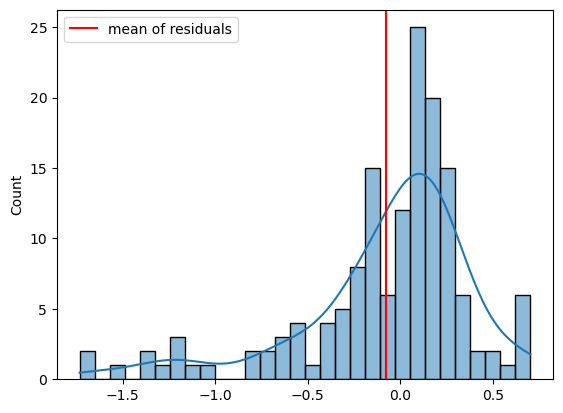

In [91]:
sns.histplot(residuals,kde=True,bins=30)
plt.axvline(np.mean(residuals),color='r',label='mean of residuals')
plt.legend(loc='best')
plt.show()

In [80]:
# Let's check the normality of residuals with shapiro test

# Null Hypothesis : Distribution is normal
# Alternate Hypothesis : Distribution is not normal

from scipy.stats import shapiro
test_stats,p_value=shapiro(residuals)
if p_value < 0.05:
    print('P-value is : ',p_value)
    print('Distribution is not Normal')
else:
    print('P-value is : ',p_value)
    print('Distribution is Normal')

P-value is :  6.512698158545049e-10
Distribution is not Normal


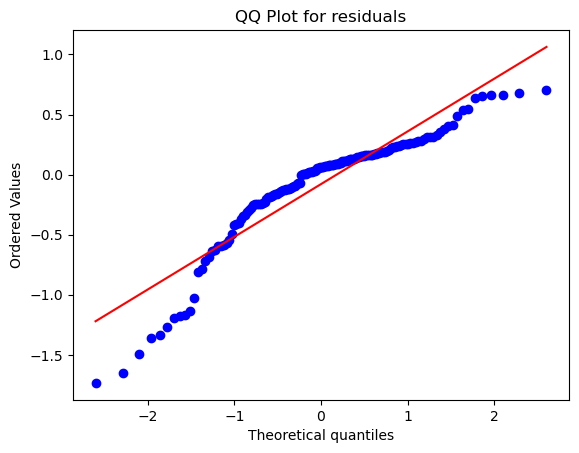

In [87]:
# Let's visualize it wit QQ plot
from scipy.stats import probplot
probplot(residuals.reshape(-1,),dist='norm',plot=plt)
plt.title('QQ Plot for residuals')
plt.show()

### Hence, it is deviating from Normal Distribution

## Let's check the linearity of residuals

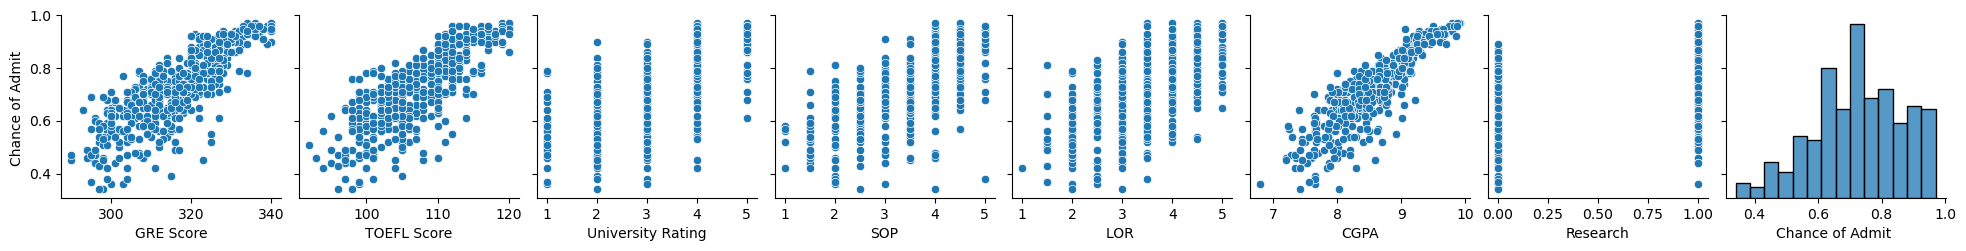

In [94]:
sns.pairplot(df,y_vars = ["Chance of Admit "])
plt.show()

## Let's check the Homoscedasticity

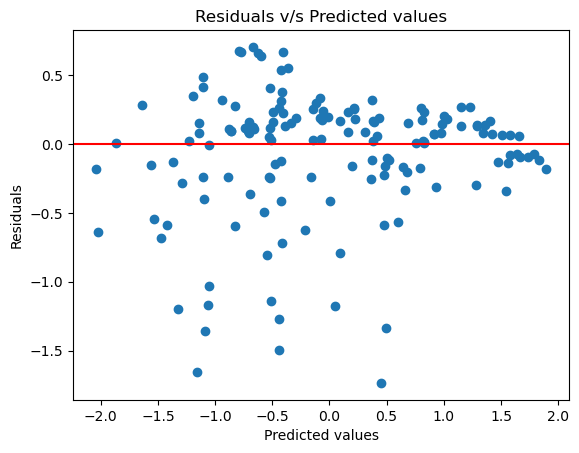

In [101]:
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.title('Residuals v/s Predicted values')
plt.show()

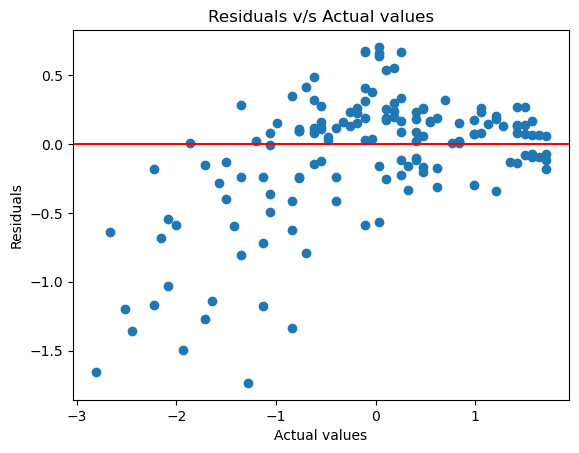

In [102]:
plt.scatter(y_test_scaled,residuals)
plt.axhline(y=0,color='r')
plt.ylabel('Residuals')
plt.xlabel('Actual values')
plt.title('Residuals v/s Actual values')
plt.show()

## Actionable Insights

#### 1.) from correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.

#### 2.) University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

#### 3.) chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or misleading data in column).

#### 4.) Range of GRE score looks like between 290 to 340.

#### 5.) range of TOEFL score is between 92 to 120.

#### 6.) university rating , SOP and LOR are distributed between range of 1 to 5.

#### 7.) CGPA range is between 6.8 to 9.92.

#### 8.) From boxplots (distribution of chance of admission (probability of getting admission) as per GRE score ) : with higher GRE score , there is high probability of getting an admission .

#### 9.) Students having high toefl score , has higher probability of getting admission .

#### 10.) from count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .

#### 11.) we can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chance of Admission .

## Business Recommendations

#### 1.) The education institute can not just help student to improve their GRE Score but can also assist them writing good LOR and SOP thus helping them admit to a better University.
#### 2.) Awareness of CGPA and Reserach Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capablities to enhance the chance of admit.
#### 3.) Any student can never change their current state of attributes so awareness and marketing campaign need to surveyed hence creating a first impression on student at undergraduate level, which wont just increase company's popularity but will also help sudent get prepared for future plans in advance.
#### 4.) A dashboard can be created for students whenever they loged in into your website, hence allowing a healthy competition also to create a progress report for students.
#### 5.) Additional features like number of hours they put in studing, watching lectures, assignments soved percentage, marks in mock test can result a better report for every student to judge themselves and improve on their own.
#### 6.) Awareness should be generated that GRE scores , TOEFL scores and CGPA are the major factors in getting a good admit at a top level institute.
#### 7.) SOPs and LORs can be good supportive documents but they are not end all be all for getting good admits.